# Importing Modules

In [1]:
import numpy as np
import pandas as pd

# Reading the Files

In [2]:
Train=pd.read_csv("V1.4_Training.csv",header=None)
Train.sample(10)

0                                                  1  2
4908     882  "It'd be great if we could chain functions tog...  1
5843    2064                  "There may be trusting problems."  0
3245   0_830  "Things like throttling and dropouts The new e...  0
4788       3  "Please support multi-segment path for this me...  1
1928  1713_1  "Few MS blog entries ( http://blogs.msdn.com/b...  0
6389    3619                          "* allow for no wrapping"  0
6212    3217  "It appears that the MapIcon rendering by the ...  0
2758   0_288  "Right now, we can only inspect the server cer...  0
5238     218  "On many systems (probably the slower ones) th...  0
7431    1116  Both Process Isolation and Hyper-V Isolation f...  0

In [3]:
Test=pd.read_csv("SubtaskA_Trial_Test.csv",header=None)
Test.sample(10)

0                                                  1  2
544   16349  "I see many developers can be benefited from t...  X
347   15602  "sir, i have samsung omnia w. its running late...  X
130   14047  "Oh, and I want the option to create labels fo...  X
261   15076  "It would be more useful if specific Service a...  X
368   15741  "It's takes quite some effort to work around t...  X
233   14702  "Show used volume, so you can see how much MB ...  X
343  155815  "We need the ability to build apps that are ca...  X
125   14041  "HP have the ePrint functionality, Apple the A...  X
576   16457  "Please enable pinning of the Wi-Fi settings o...  X
418   16036  "I'd like to control the priority of this back...  X

In [4]:
Test.drop(2,axis=1,inplace=True)
Test.sample(10)

0                                                  1
155   14193  "Would be nice and useful to have email messag...
408   15992  "The ability to broadcast and bind sockets to ...
491   16257  "It was available in WM6.5 (and older) so it w...
310  153814  "You either have re-enter all the info, or cha...
370   15771  "It'd be great if you would work on a solution...
414   16032  "windows phone dev is powerless without low le...
372   15773  "with this mod we can enjoy the platform more ...
453  160725                    "wifi data transfer wp7 to wp7"
181   14351  "If immediate approval is not possible, then a...
523  162717  "So like google, facebook, linkedin I want to ...

In [5]:
Eval=pd.read_csv("SubtaskA_EvaluationData.csv",header=None)
Eval.sample(6)

0                                                  1  2
229   4595  Removing the support email from the webpage wo...  X
223   4578  Same for video not only making (desktop/window...  X
317   4844  I guess it is result of extremely short quantu...  X
132   3530    I'd like to have implicit DataTemplates in UWP.  X
57   10633  It will be pleasant to go the main page of the...  X
698   5843  Using EF6/7 will only provide direct access to...  X

In [6]:
Eval.drop(2,axis=1,inplace=True)
Eval.sample(10)

0                                                  1
191  4250  With Project Rome I can discover devices of ot...
741  6047  It is frustrated for a devoloper then an app i...
435  5120  The sole purpose of us using the SFB is to lim...
562  5494  When we want to set app price Dev Center offer...
724  5961  I developed the app bizview a Google Analytics...
454  5171            So this is really terrible for an app !
643  5721  Unfortunately the glyph activity is never disp...
600  5587  In windows forms it is easy to have users prin...
139  3718        This is only relevant for desktop UWP apps.
312  4834  Currently when using a ControlChannelTrigger w...

In [7]:
Eval.describe(include=['O'])

1
count                                                 833
unique                                                833
top     They work fine without the headers and librari...
freq                                                    1

# Join the DataSets

In [8]:
combDf = Train.append([Eval], ignore_index=True)
combDf.sample(10)

0                                                  1    2
8620    3336  I am migrating my app from Windows Desktop usi...  NaN
1138  1274_6  "The only possibility to create Route is Route...  0.0
784    874_1  "windowsphone8.1____________î«_______________...  0.0
4257   912_2                 "as it occurs on Android and iOS."  0.0
9062    5494  When we want to set app price Dev Center offer...  NaN
6802    3729  "Allow other formats than PCM and float for a ...  1.0
7203     575                         Tested in both c++ and c#.  0.0
8025    1664  Something in both Silverlight and WPF but miss...  0.0
5381     573             "No sample code yet available in SDK."  0.0
4251  0_2162  "This is one of my primary use flows and a big...  0.0


# Label the Columns

In [9]:
combDf.columns=['id','sentence','label']
combDf.sample(10)

id                                           sentence  label
8789    4766  Before UWP CurrentCulture reflected the Region...    NaN
1181  1287_6  "Please return to the Windows Phone Dev Center...    1.0
6196    3185    "Microsoft IME and JustSystems ATOK work fine."    0.0
1602  1512_7  "This would make it very easy to repeatably te...    0.0
671   843_14  "I understand that it makes sense to only show...    0.0
2381  1841_4  "In all these cases it breaks the update cycle...    0.0
2859   0_404                  "It keeps hanging after I login."    0.0
3721  0_1625  "I cannot tell if this is a problem with Edge ...    0.0
3604  0_1507  "I keep reading that that's possible, but can'...    0.0
8990    5252  System.Diagnostics.Process.Start(path); with p...    NaN

# Checking if their is any missing value

In [10]:
combDf.describe(include=['O'])
combDf["label"].unique()

array([ 1.,  0., nan])

In [11]:
combDf.shape

(9333, 3)

# Conveting the sentence to LowerCase

In [12]:
combDf["sentence"] = combDf["sentence"].str.lower()
combDf.sample(7)

id                                           sentence  label
4867     647  "please check these links where users discusse...    1.0
289    752_2  "a thing that would be increbible is that your...    1.0
4860     589  "also it would be great if there is an option ...    1.0
5985    2526  "the updatetask or preconfigurationtask capabi...    0.0
5876    2171  "page has no more safe area but on the transpo...    0.0
5313     373  "our primary uwp app is currently compiled as ...    0.0
2129  1764_2  "other implementations of sql ce already suppo...    0.0

# Defining function to remove patterns 

In [13]:
import re
def remove_pat(s1, pat, nstr):
    return re.sub(pat, nstr, s1)

# Removing special Characters

In [14]:
combDf["new"] = np.vectorize(remove_pat)(combDf["sentence"], "[^a-zA-Z#_]+", " ")
combDf.sample(5)

id                                           sentence  label  \
7408    1050  for now we have no option but to re-build the ...    0.0   
7037    5636  "this suggestion is for the windows blog and i...    1.0   
2154  1770_1  "i can hear people hardly when calling mobile ...    0.0   
325    759_3  "so here is my scenario and you can clearly se...    0.0   
4488   966_5  "the only workaround just now is to keep track...    0.0   

                                                    new  
7408  for now we have no option but to re build the ...  
7037   this suggestion is for the windows blog and i...  
2154   i can hear people hardly when calling mobile ...  
325    so here is my scenario and you can clearly se...  
4488   the only workaround just now is to keep track...

#  Removing the words whose length is less than 3

In [15]:
combDf["new"] = np.vectorize(remove_pat)(combDf["new"], r"\b[a-z]{1,2}\b", " ")
combDf.sample(10)

id                                           sentence  label  \
6581   4191  "warning 4668 is an extra one we have enabled ...    0.0   
8440   2718  i don't see this limitation documentated anywh...    0.0   
665   843_8  "it's not currently possible to access the wir...    0.0   
2734  0_257                                      "please vote"    0.0   
299   756_1  "windows 8.1 sdk brought a lot of built in tra...    0.0   
2619  0_126  "right now we can't show progress on the taskb...    0.0   
9070   5504  conversion rate seems not constant because of ...    NaN   
5473    821  "but this details are available in battery use...    0.0   
18    667_2                  "this in driving mode activated."    0.0   
7002   4945           "wpf apps work much better when ngen'd."    0.0   

                                                    new  
6581   warning     extra one   have enabled beyond w...  
8440    don   see this limitation documentated anywh...  
665        not currently possible   access the wirel...  
2734                                       please vote   
299    windows sdk brought   lot   built   transitio...  
2619   right now   can   show progress   the taskbar...  
9070  conversion rate seems not constant because   t...  
5473   but this details are available   battery use ...  
18                       this   driving mode activated   
7002             wpf apps work much better when ngen

# Combining all sentences

In [16]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in combDf['new']])
all_words

' please enable removing language code from the dev center language history for example   you ever selected   and     laguages and you published this xap   the store then   causes tile localization   show the     default tile localization which   bad   note   your csproj file there     supportedcultures entry like this supportedcultures           supportedcultures when   removed the   language code and published   new xap version the old xap version still remains   the store with replaced and unpublished   wich means the new version not fully replaced the old version and this causes   very serious problems   some     users will still receive the old xap version     app   the store randomly gives the old xap   the new xap version     app     app has     version and     version xap   the same submission   the   xap works only     and the   xap works only for     sometimes the store gives the wrong   xap version     app   windows phone users     should     option   remove the   language c

# Removing Stop Words

In [17]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(all_words) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  
print(filtered_sentence) 

['please', 'enable', 'removing', 'language', 'code', 'dev', 'center', 'language', 'history', 'example', 'ever', 'selected', 'laguages', 'published', 'xap', 'store', 'causes', 'tile', 'localization', 'show', 'default', 'tile', 'localization', 'bad', 'note', 'csproj', 'file', 'supportedcultures', 'entry', 'like', 'supportedcultures', 'supportedcultures', 'removed', 'language', 'code', 'published', 'new', 'xap', 'version', 'old', 'xap', 'version', 'still', 'remains', 'store', 'replaced', 'unpublished', 'wich', 'means', 'new', 'version', 'fully', 'replaced', 'old', 'version', 'causes', 'serious', 'problems', 'users', 'still', 'receive', 'old', 'xap', 'version', 'app', 'store', 'randomly', 'gives', 'old', 'xap', 'new', 'xap', 'version', 'app', 'app', 'version', 'version', 'xap', 'submission', 'xap', 'works', 'xap', 'works', 'sometimes', 'store', 'gives', 'wrong', 'xap', 'version', 'app', 'windows', 'phone', 'users', 'option', 'remove', 'language', 'code', 'app', 'language', 'history', 'opti

# Creating Frequency List 

In [18]:
import nltk
freq = nltk.FreqDist(filtered_sentence) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

please:430
enable:67
removing:16
language:89
code:252
dev:127
center:104
history:31
example:212
ever:24
selected:49
laguages:4
published:36
xap:26
store:423
causes:28
tile:78
localization:16
show:140
default:93
bad:47
note:35
csproj:2
file:282
supportedcultures:3
entry:20
like:778
removed:26
new:348
version:179
old:57
still:140
remains:12
replaced:11
unpublished:4
wich:7
means:65
fully:30
serious:16
problems:43
users:250
receive:37
app:1523
randomly:8
gives:27
submission:33
works:108
sometimes:49
wrong:48
windows:1146
phone:666
option:194
remove:69
completly:4
replace:15
prevoius:2
currently:326
mistakenly:1
situation:20
forever:3
live:68
displayed:53
russian:4
english:18
one:399
publish:21
update:165
truble:2
deliver:6
write:55
lot:130
support:361
ticket:4
really:153
cares:3
issue:146
engineering:3
team:30
solve:14
following:57
provide:178
workaround:14
need:289
culture:7
way:352
posted:13
add:424
implement:66
appreslib:4
dll:14
xxxx:4
mui:4
documentation:39
exist:27
http:171
msdn:69


logical:1
sounds:10
processing:25
firefox:22
worked:14
late:5
sharpdx:4
codebehind:1
path:49
throws:11
unable:21
invoice:13
incredibly:4
unpopular:1
accountant:1
snail:1
invoices:2
leading:1
technology:11
business:40
flashsms:1
blocked:7
unanswered:2
somewhere:14
creates:11
resized:7
smaller:13
uploads:7
cloud:26
finds:4
deletes:4
lets:19
assume:16
stolen:1
password:49
thief:2
stays:5
resize:4
police:1
cloud___:1
located:5
memory:41
signal:16
reception:2
uncut:1
sometime:1
city:3
often:34
loses:2
strong:14
going___:1
hope:45
tiles___:1
wonder:4
switches:3
oldest:3
ones:29
closed:20
menues:1
denies:1
pin:26
corporation:2
appreciate:11
pull:13
specified:14
keyword:11
descriptive:2
overlays:3
screenshot:18
sensitive:12
fullscreen:11
stardock:1
deskscapes:1
trick:2
notice:15
easiest:3
waterfall:1
bet:2
spinning:3
earth:8
wind:1
blowing:1
river:1
streaming:10
waterfalls:1
anyone:13
knowing:2
freezing:1
helpful:34
reminder:27
starts:16
ends:6
month:10
reminds:2
tue:1
render:10
pdf:33
link:80

____________________________________:4
wifi__:1
___________________________:3
__wifi________________:1
________________________________________________________________________________________________________________condensed_______________________________________________________________:1
_______________________________________pivot__________________________________________________________________________________________________________________________________:1
_________x:1
height___________________________________________________________________________________________________________________________________________:1
barcode:10
scans:1
sees:6
decoded:5
invoke:15
scanner:2
thumbnail:3
significal:1
advanced:7
yves:1
testcases:1
ie_mobi:1
keyup_event:1
slight:2
cover:7
forth:4
sbs:1
gel:1
university:2
likes:3
grown:2
tech:5
demos:1
prototypes:1
react:4
unintelligibly:1
custommer:1
balance:2
choise:1
tcp:11
dozen:2
clipped:4
stressing:1
stpid:1
keabord:1
dissapearing:1
sht:1
hyperlinks:

combined:3
drop:24
cycle:5
simpler:6
altough:1
acrobet:1
achieving:1
embedding:1
expereince:1
maximum:16
minute:13
perspective:5
hassle:4
case___:1
___________________________________________________________________________________________________________________________________________________:1
_____________________________________________________________________________________________:1
__________________________________________________________________________________________________________________:1
international:6
hugs:1
_________________________________________________________________________________________________________windowsphone:1
______________________________________________________________________________________________________________________________________:1
__________________________________________________________________________________________________________:1
dislike:2
syncs:2
availiable:1
multiselectlist:1
destroys:1
checks:9
urls:7
codeproject:1
zunes:1
au

onlineidauthenticator:2
credentialprompttype:2
retypecredentials:2
sso:3
flaw:3
proceed:2
treated:2
i_____:1
otg:1
helpfulness:1
statistically:1
usefulness:1
dump:3
smil:20
declarative:3
human:1
timing:3
rare:1
proprietary:1
animation:24
codepen:2
depth:33
show_forks:2
opendocument:4
graphic:6
oasis:2
__refheading__:2
polyfill:2
eric:3
willigers:1
entirely:4
ericwilligers:1
describe:1
interchange:1
lingua:1
franca:1
need_____:1
accessory:4
compatibility:6
pebble:1
metawatch:1
enablement:1
layouts:1
swapchainpanel:2
layering:1
redeem:1
tshell:3
manufacturers:3
inclusion:3
traditional:6
collaborative:1
thoughts:4
intergate:1
halo:2
lip:1
syncing:1
tou:1
talikng:1
westminster:1
appointmentstore:1
retrieved:2
requeststoreasync:1
appointmentstoreaccesstype:1
appcalendarsreadwrite:1
getappointmentcalendarasync:1
findappointmentcalendarsasync:1
unauthorized:2
study:1
brazilian:4
botched:2
portuguese:2
insider:21
insider_wintp:3
insider_perf:1
fbed:1
cbbca:1
writers:1
looked:5
xen:1
embed:4
tr

curinlinelength:1
hastebin:1
legulilabu:1
oss:1
laptops:2
applicationviewmode:1
compactoverlay:1
approximately:2
arbitrary:4
eventsetter:2
datagridrows:1
itemclicked:1
misbehaving:1
monkeyed:1
unsucceesful:1
cleaning:1
keeplastiteminview:1
odd:1
mousewheel:4
struggled:1
filed:2
aims:1
zeroconf:1
ietf:1
_services:2
_dns:2
_udp:2
plugging:2
avahi:1
reflect:1
inadvertently:1
wasting:4
eats:1
contacted:3
srx:2
clutters:3
flighting:1
segmentation:1
unused:1
eat:1
screws:1
blasts:1
metric:1
irritant:1
death:1
cuts:1
resolving:2
reboots:2
violates:1
expectations:1
semanticzoom:2
backrequested:7
xpadder:2
doubling:1
mainpage:4
mainpage_obj:2
_bindings:2
bindingstracking:2
meg:1
gigs:1
humanity:1
changelog:2
spotify:4
ncbcszsjrsb:1
sysem:2
discovered:3
webgl:5
menyflyout:2
frameworkelement:2
menuflyoutpresenter:8
semitransparency:2
headache:4
harware:2
xyz:2
automtically:2
invokes:2
wziitq:2
timedtextcues:2
timedmetadatatrack:2
starttime:2
guessing:4
understandable:6
cues:2
externaltimedmetadat

judgement:1
absolute:1
defult:1
systemaccentbrush:1
becouse:1
mis:1
classify:1
instantiation:1
cumulative:3
clickonce:1
msis:1
modified:1
reinvent:1
realtime:2
perfview:1
monitoring:1
tremendous:2
conent:1
hackathon:1
cyprus:1
neglect:1
attendee:1
kenya:1
leo:1
relevance:1
eater:1
setsockopt:1
pleasing:1
shipped:1
fta:1
changeable:1
handshake:1
scratching:1
msbuild:1
layoutfile:1
appxpackagefilelist:1
skipped:1
vsdproj:1
packagelayout:1
appdata:1
rendring:1
stdio:1
dare:1
continuous:1
nxp:1
modul:1
standards:1
confidential:1
costumer:1
sfb:1
handwrite:1
london:1
constructed:1
overlooked:1
submits:1
exsiting:1
bypasses:1
automaticallyupdated:1
conflict:1
filetype:1
winium:1
dat:1
localsettings:1
roamedsettings:1
ssml:1
occasionally:1
fiddler:1
instruments:2
soap:1
cmd:1
makeappx:1
commando:1
rels:2
yout:1
exploited:2
insights:1
stacktraces:1
approximative:1
insanely:1
smaato:1
startinfo:1
soemthing:1
workong:1
inresponsive:1
evertying:1
newwindowrequested:1
hasfocus:3
firstrun:2
filethe

In [19]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
filtered_sentence=TreebankWordDetokenizer().detokenize(filtered_sentence)
filtered_sentence

'please enable removing language code dev center language history example ever selected laguages published xap store causes tile localization show default tile localization bad note csproj file supportedcultures entry like supportedcultures supportedcultures removed language code published new xap version old xap version still remains store replaced unpublished wich means new version fully replaced old version causes serious problems users still receive old xap version app store randomly gives old xap new xap version app app version version xap submission xap works xap works sometimes store gives wrong xap version app windows phone users option remove language code app language history option completly replace fully replace prevoius xap currently ever mistakenly selected language bad situation forever live wrong tile displayed russian language store english one publish update removed language update fully replace old version truble store randomly deliver old wrong version xap write lot

# Creating WordCloud

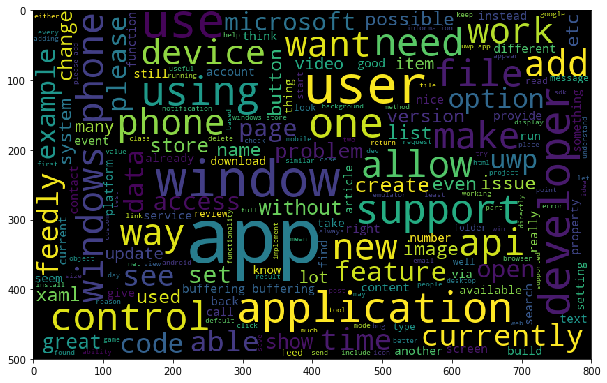

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(filtered_sentence)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.show()

# Creating FreqDist Graph

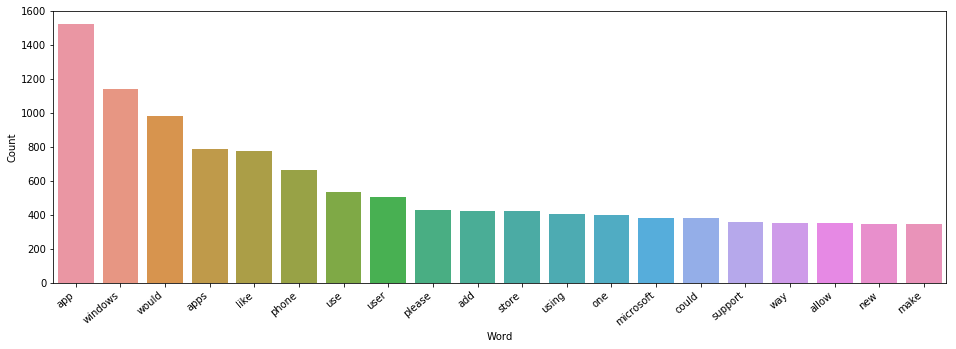

In [21]:
import nltk
import seaborn as sns
a = nltk.FreqDist(filtered_sentence.split())
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})

d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set_xticklabels(d["Word"], rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.show()

# Creating Sparse Matrix

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
df = combDf[combDf["label"].isin([0,1])]
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=3000, stop_words='english')
bow = tfidf_vectorizer.fit_transform(df['new'])
print(df.shape)
print(bow.shape)
df.head()

(8500, 4)
(8500, 3000)


id                                           sentence  label  \
0  663_3  "please enable removing language code from the...    1.0   
1  663_4  "note: in your .csproj file, there is a suppor...    0.0   
2  664_1  "wich means the new version not fully replaced...    0.0   
3  664_2  "some of my users will still receive the old x...    0.0   
4  664_3  "the store randomly gives the old xap or the n...    0.0   

                                                 new  
0   please enable removing language code from the...  
1   note   your csproj file there     supportedcu...  
2   wich means the new version not fully replaced...  
3   some     users will still receive the old xap...  
4   the store randomly gives the old xap   the ne...

# Creating Baseline model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
X = bow
y = df["label"]

In [24]:
model = XGBClassifier()
n_estimators = [int(x) for x in np.linspace(start=1, stop=200, num = 4)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 50, num = 11)]
max_depth.append(None)
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'eta': [x for x in np.linspace(start=0.01, stop=0.2, num = 4)],
               'min_child_weight ': [int(x) for x in np.linspace(start=1, stop=11, num = 4)],
               'max_depth ': [int(x) for x in np.linspace(start=3, stop=10, num = 4)],
               'gamma': [int(x) for x in np.linspace(start=0, stop=10, num = 4)],
               'subsample': [x for x in np.linspace(start=0.5, stop=1, num = 4)]}
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, cv = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf_random.fit(X_train, y_train)
rf_random.best_params_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future thi

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future thi

{'subsample': 0.8333333333333333,
 'min_child_weight ': 11,
 'max_depth ': 10,
 'gamma': 6,
 'eta': 0.01}

In [25]:
model = XGBClassifier(**rf_random.best_params_)
model.fit(X_train, y_train)
print(model.score(X_test,y_test))
yp = model.predict(X_test)
yp = model.predict(X_test)
cm = confusion_matrix(yp, y_test)
y_test[y_test==1].count()
cm

0.7970588235294118


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[1226,  291],
       [  54,  129]], dtype=int64)

# Classification based on threshold

In [26]:
threshold = 0.2
yp2_prob = model.predict_proba(X_test)
yp2 = (yp2_prob [:,1] >= threshold).astype('int')
cm = confusion_matrix(yp2, y_test)
y_test[y_test==1].count()
cm

array([[983, 110],
       [297, 310]], dtype=int64)

In [27]:
s1 = "white and black are not same"
s1New = tfidf_vectorizer.transform([s1])
print(s1New.shape)
p = model.predict(s1New)
print(p)
model.predict_proba(s1New)

(1, 3000)
[0.]


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[0.8510442, 0.1489558]], dtype=float32)

In [28]:
df2=combDf[combDf["label"].isna()]
print(df2.shape)
df2.head()

(833, 4)


id                                           sentence  label  \
8500  9566         this would enable live traffic aware apps.    NaN   
8501  9569  please try other formatting like bold italics ...    NaN   
8502  9576  since computers were invented to save time i s...    NaN   
8503  9577  allow rearranging if the user wants to change ...    NaN   
8504  9579  add simd instructions for better use of arm ne...    NaN   

                                                    new  
8500         this would enable live traffic aware apps   
8501  please try other formatting like bold italics ...  
8502  since computers were invented   save time   su...  
8503  allow rearranging   the user wants   change them   
8504  add simd instructions for better use   arm neo...

In [29]:
bow1 = tfidf_vectorizer.transform(df2["new"])
bow1.shape

(833, 3000)

In [30]:
a=df2["id"]
b=df2["new"]
yp = model.predict(bow1)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [31]:
yp.shape

(833,)

In [32]:
sub=pd.DataFrame({
    "Id":a,
    "sentence":b,
    "label":yp
})
sub.to_csv('Submission.csv',index=False,header=False)